In [ ]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Reading
df01 = pd.read_csv("MasterFile_6-1-23.csv", index_col=0)
dfML = pd.read_csv("MasterFile_6-1-23.csv" )




# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline


from statistics import mean

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm



# ML 
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb



Apply Logging or logarithm = reverse of exponent.
Log will bring the value highest value down to comparable scale in ML model.

 example: 5(base) exponent of 3 is =  125 (5x5x5)
  or log5 125 -> 3 
  Default value of ML log is log10 -> 1
                            log10 -> 100 (10x10)

Creating new a column for each log value in the df. 

In [502]:
dfML['Log_DB_Values'] = np.log((dfML.DB_Values)+ 10.0)

In [503]:
dfML['Log_OB_Values'] = np.log((dfML.OB_Values))

In [504]:
dfML['Log_HC_Values'] = np.log((dfML.HC_Values)+15)

In [505]:
dfML['Log_HD_Values'] = np.log((dfML.HD_Values) + 15.0)

In [506]:
dfML['Log_HBP_Values'] = np.log((dfML.HBP_Values))

In [507]:
dfML['Log_Target_Values'] = np.log((dfML.TargetStroke)+20.00)

In [508]:
dfML.columns

Index(['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High',
       'TargetStroke', 'Log_DB_Values', 'Log_OB_Values', 'Log_HC_Values',
       'Log_HD_Values', 'Log_HBP_Values', 'Log_Target_Values'],
      dtype='object')

In [509]:
# dropping for the subplot - boxplots below
dfML_Log = dfML.drop(columns=['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High', 'TargetStroke', ])
#dfBP_01 = dfML_01.rename(columns={'DB_Values':'DB', 'DB_Low':'DBLo', 'DB_High':'DBHx', 'OB_Values':'OB', 'OB_Low':'OBLo', 'OB_High':'OBHx',  'HC_Values':'HC', 'HC_Low':'HCLo',  'HC_High':'HCHx',  'HD_Values':'HD',   'HD_Low':'HDLo',  'HD_High':'HDHx', 'HBP_Values':'HBP', 'HBP_Low':'HBPLo','HBP_High':'HBPHx','TargetStroke':'Target' })

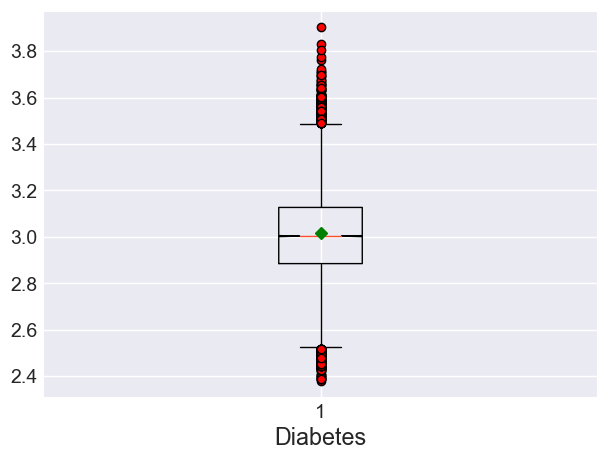

In [510]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=dfML_Log['Log_DB_Values'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);
plt.xlabel('Diabetes')
plt.show()

Log 1p transform

In [511]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

Building an isolation Forest Model to visualize outliers.

In [512]:

anomaly_inputs = ['Log_DB_Values',  'Log_OB_Values',  
       'Log_HD_Values',   'Log_HC_Values',  
       'Log_HBP_Values', 'Log_Target_Values']

from sklearn.ensemble import IsolationForest
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(dfML_Log[anomaly_inputs])



c:\Users\dolly\AppData\Local\R-MINI~1\envs\datascience-pro-env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

# visualize outliers

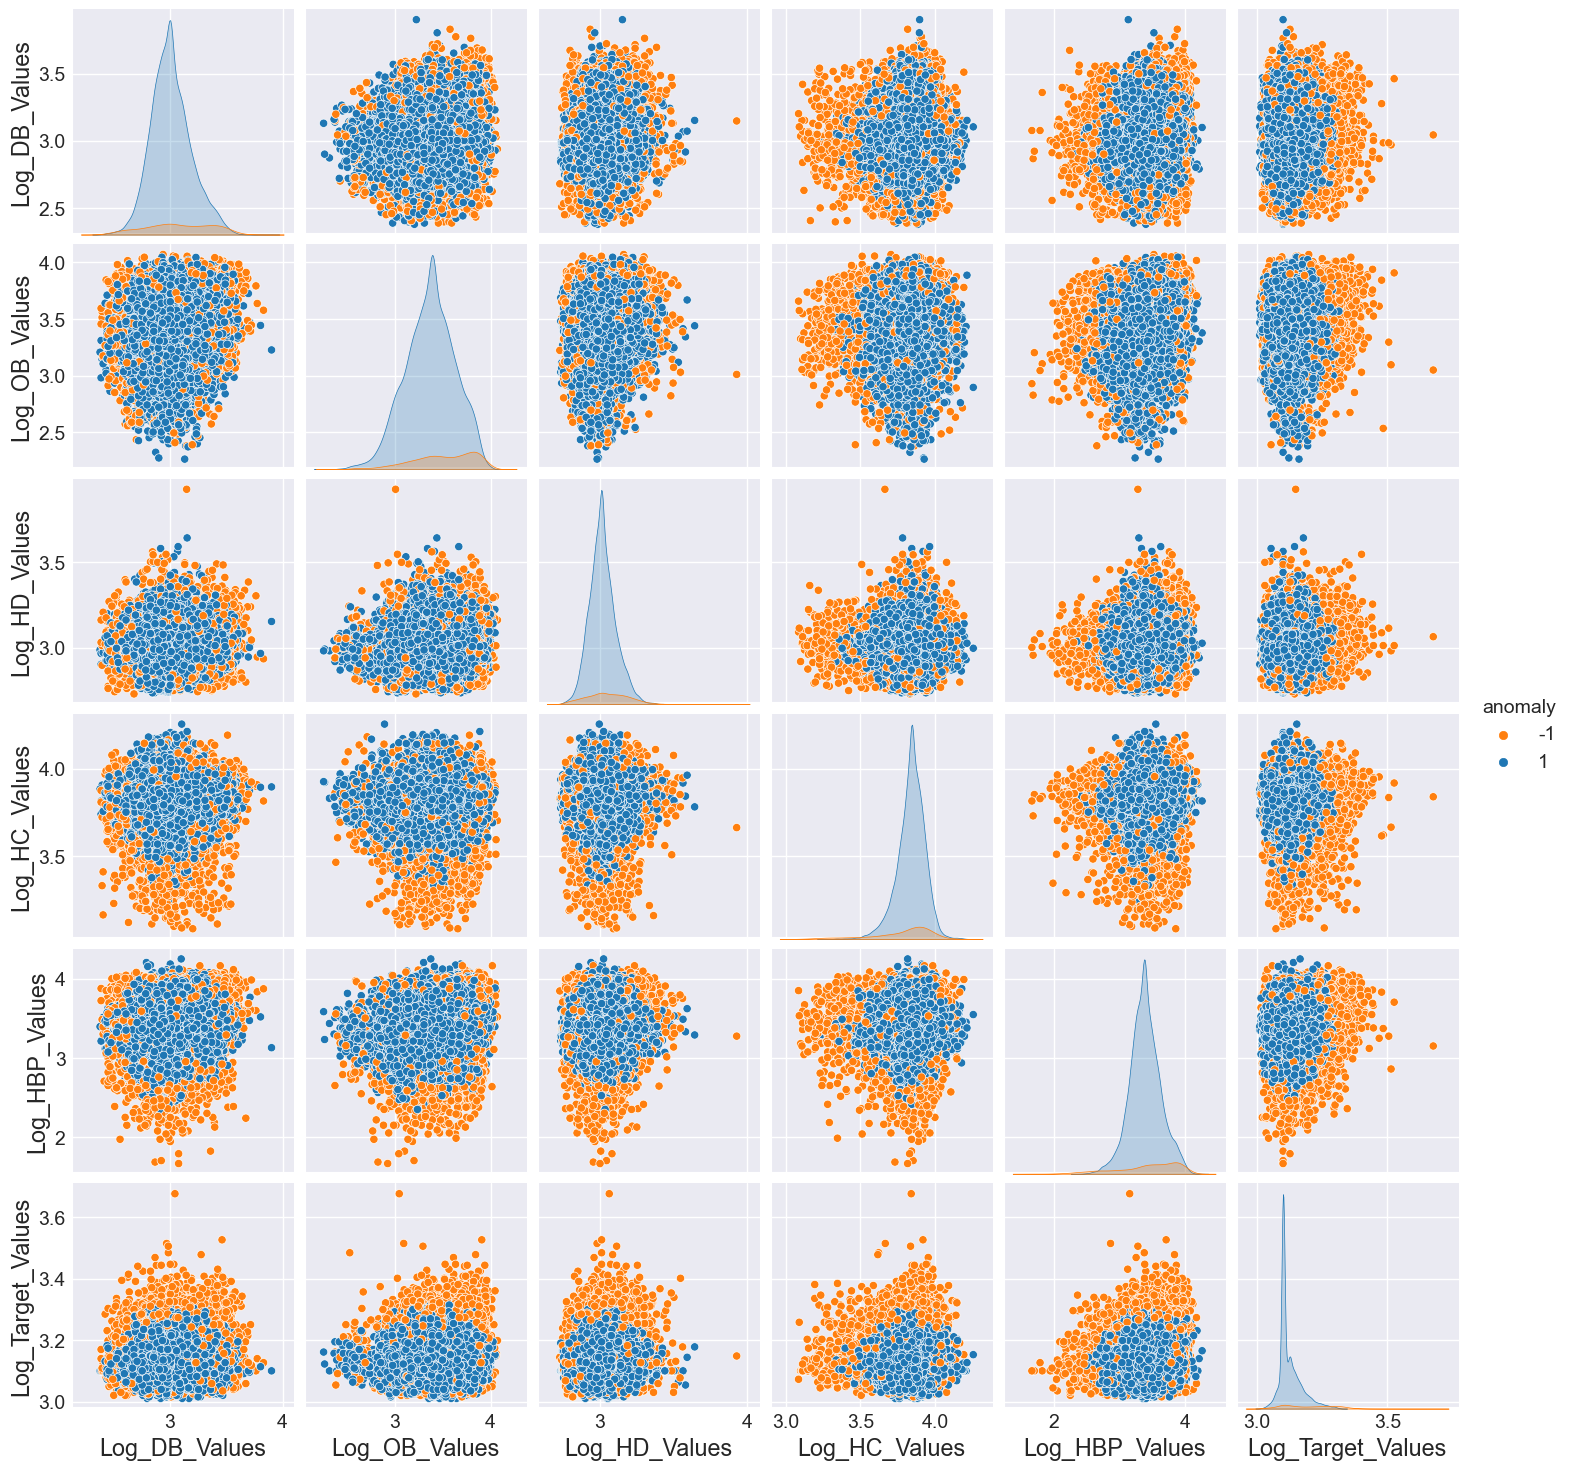

In [513]:
dfML_Log['anomaly_scores'] = model_IF.decision_function(dfML_Log[anomaly_inputs])
dfML_Log['anomaly'] = model_IF.predict(dfML_Log[anomaly_inputs])

palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(dfML_Log, vars=anomaly_inputs, hue='anomaly', palette=palette)

### Cal. each upper and lower quantiles.


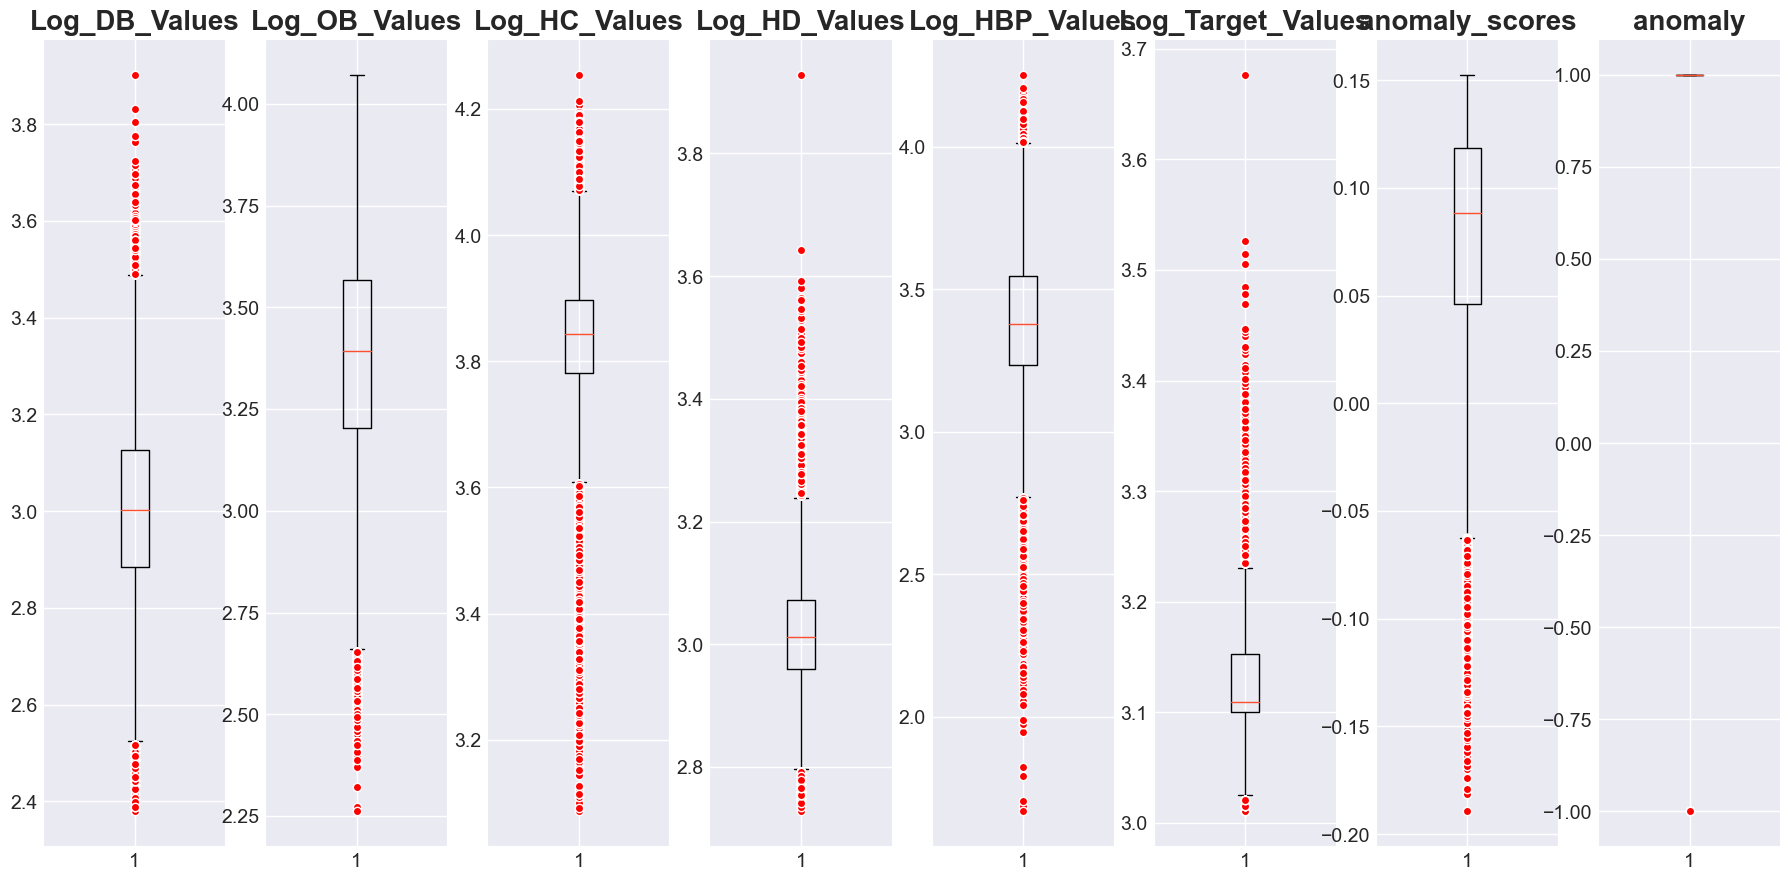

In [514]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML_Log.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML_Log.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML_Log.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

In [566]:
q01 = dfML_Log['Log_DB_Values'] .quantile(0.97)
q02 = dfML_Log['Log_DB_Values'] .quantile(0.03)
#q03 = dfML['DB_Low'] .quantile(0.90)
#q04 =  dfML['DB_Low'] .quantile(0.01)
#q05 = dfML['DB_High'] .quantile(0.90)
#q06 = dfML['DB_High'] .quantile(0.01)

q07 =  dfML_Log['Log_OB_Values'] .quantile(0.97)
q08 =  dfML_Log['Log_OB_Values'] .quantile(0.02)
#q09 =  dfML['OB_Low'] .quantile(0.95)
#q10 =  dfML['OB_Low'] .quantile(0.01)
#q11 =  dfML['OB_High'] .quantile(0.95)
#q12 =  dfML1['OB_High'] .quantile(0.01)


q13 =  dfML_Log['Log_HC_Values'] .quantile(0.99)
q14 =  dfML_Log['Log_HC_Values'] .quantile(0.1)
#q15 =  dfML['HC_Low'] .quantile(0.95)
#q16 =  dfML['HC_Low'] .quantile(0.02)
##q17 =  dfML['HC_High'] .quantile(0.95)
#q18 =  dfML['HC_High'] .quantile(0.02)


q19 =  dfML_Log['Log_HD_Values'] .quantile(0.85)
q20 =  dfML_Log['Log_HD_Values'] .quantile(0.03)
#q21 = dfML['HD_Low'] .quantile(0.90)
#q22 =  dfML['HD_Low'] .quantile(0.01)
#q23 =  dfML['HD_High'] .quantile(0.90)
#q24 =  dfML['HD_High'] .quantile(0.01)

q25 =  dfML_Log['Log_HBP_Values'] .quantile(0.95)
q26 = dfML_Log['Log_HBP_Values'] .quantile(0.01)
#q27 =  dfML['HBP_Low'] .quantile(0.89)
#q28 =  dfML['HBP_Low'] .quantile(0.02)
#q29 =  dfML['HBP_High'] .quantile(0.89)
#q30 = dfML['HBP_High'] .quantile(0.02)


q31 = dfML_Log['Log_Target_Values'].quantile(0.77)
q32 = dfML_Log['Log_Target_Values'].quantile(0.04)

print(q01)
print(q02)
print()
print(q07)
print(q08)
print()
print(q13)
print(q14)
print()
print(q19)
print(q20)
print()
print(q25)
print(q26)

3.427514689979529
2.6741486494265287

3.858622228701031
2.8094026953624978

4.041295341132285
3.7062280924485496

3.1179499062782403
2.8507065015037334

3.8501476017100584
2.617395832834079


### Extacting and Trimming the outliers

In [567]:
df = dfML_Log[(dfML_Log['Log_DB_Values'] >=q02 ) & (dfML_Log['Log_DB_Values'] <= q01) &
        (dfML_Log['Log_OB_Values'] >= q08) &  (dfML_Log['Log_OB_Values'] <= q07) &
        (dfML_Log['Log_HC_Values'] >= q14) & (dfML_Log['Log_HC_Values'] <= q13) &
        (dfML_Log['Log_HD_Values'] >= q20) & (dfML_Log['Log_HD_Values'] <= q19) &
        (dfML_Log['Log_HBP_Values'] >= q26) & (dfML_Log['Log_HBP_Values'] <= q25) &
        (dfML_Log['Log_Target_Values'] >= q32) & (dfML_Log['Log_Target_Values'] <=q31) ]

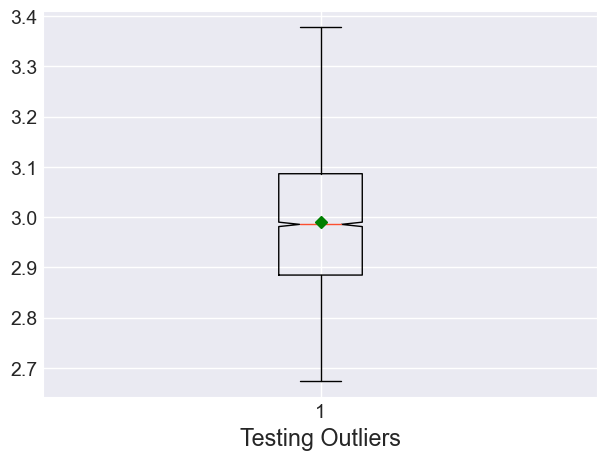

In [555]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=df['Log_DB_Values'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);
plt.xlabel('Testing Outliers')
plt.show()

In [568]:
df = dfML_Log.drop(columns=[ 'anomaly_scores', 'anomaly' ])

### dfML dataframe without outliers. 

In [520]:
df.columns

Index(['Log_DB_Values', 'Log_OB_Values', 'Log_HC_Values', 'Log_HD_Values',
       'Log_HBP_Values', 'Log_Target_Values'],
      dtype='object')

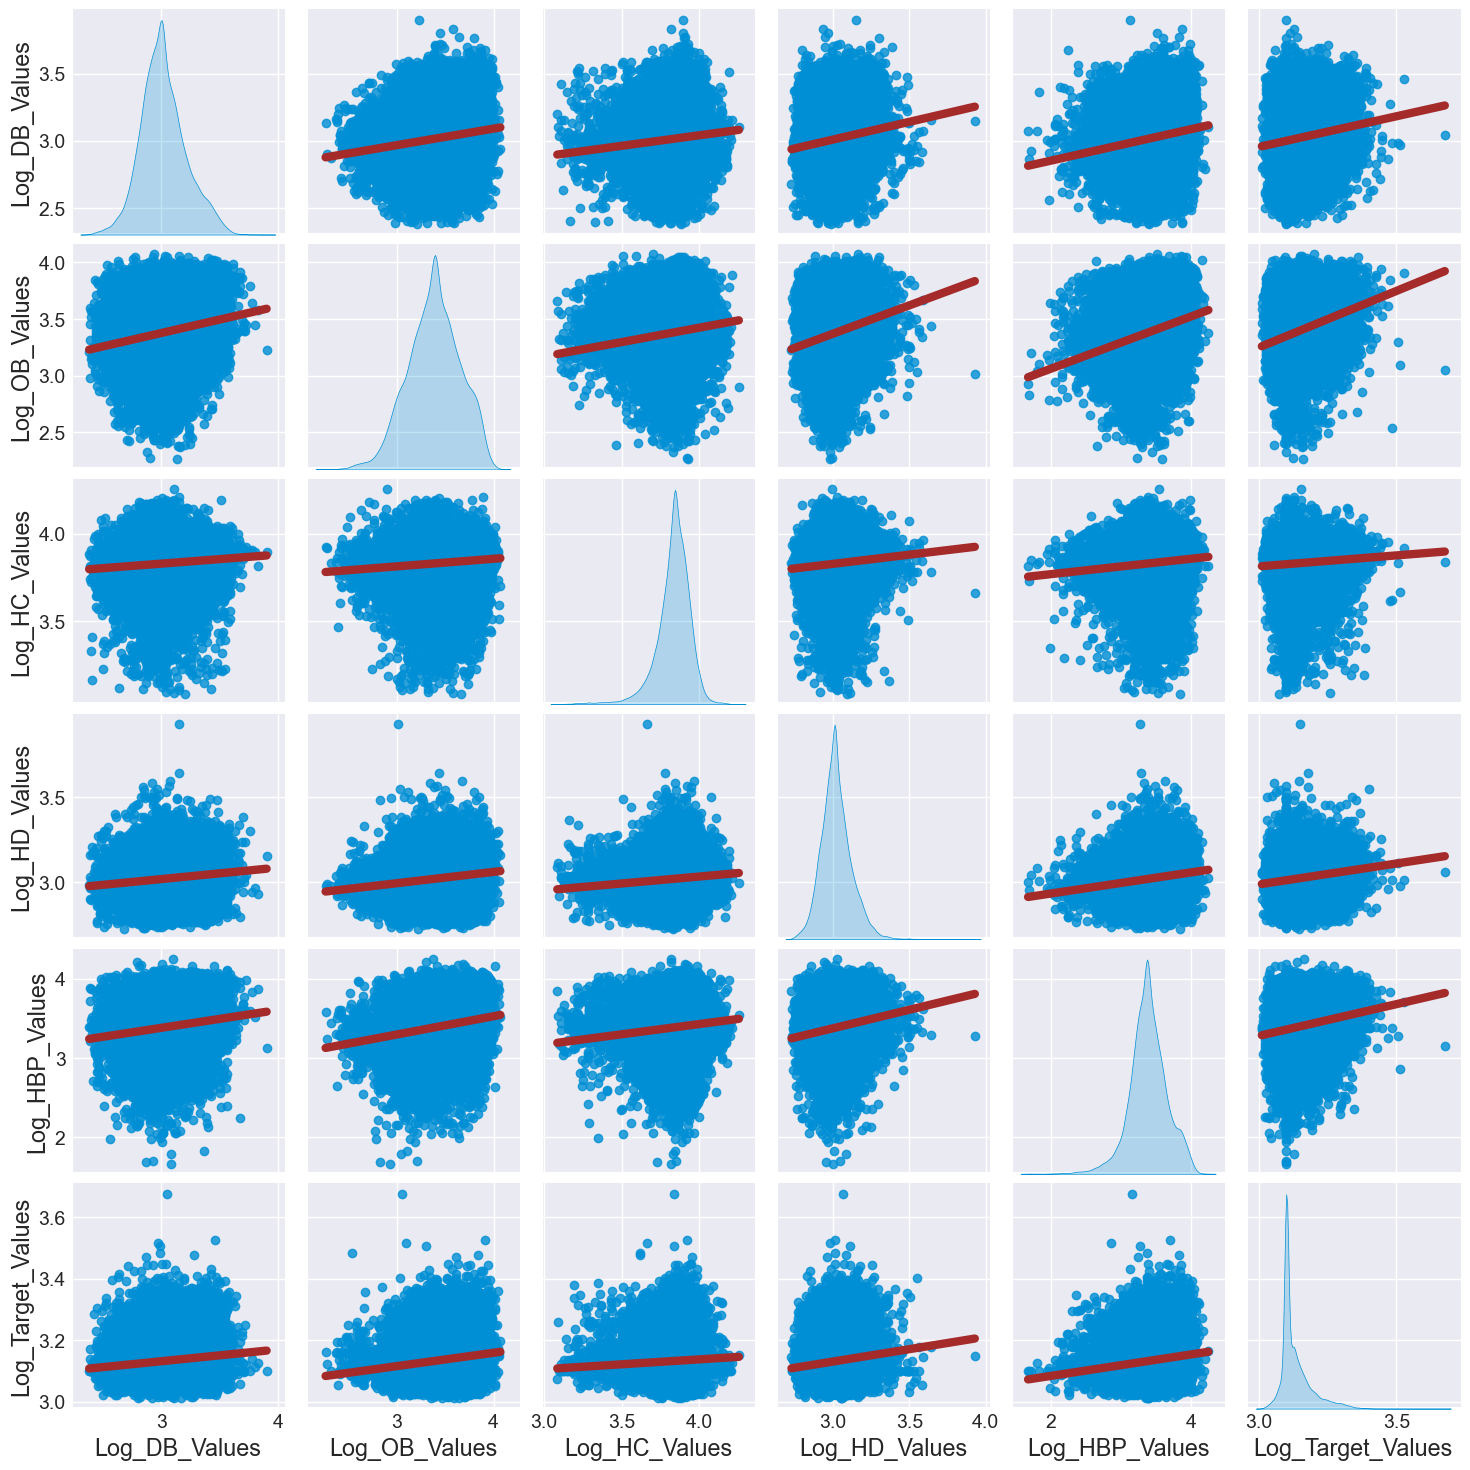

In [569]:
col_to_plot01 = ['Log_DB_Values', 'Log_OB_Values', 'Log_HC_Values','Log_HD_Values', 'Log_HBP_Values','Log_Target_Values' ]
sns.pairplot(df[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})

In [522]:
df.corr()['Log_Target_Values']

Log_DB_Values        0.132158
Log_OB_Values        0.208446
Log_HC_Values        0.063471
Log_HD_Values        0.140478
Log_HBP_Values       0.167057
Log_Target_Values    1.000000
Name: Log_Target_Values, dtype: float64

df - ML model including "statenames"

In [570]:
dfML_Final = df.drop(columns=['Log_Target_Values'])

In [571]:
dfML_Final

,Log_DB_Values,Log_OB_Values,Log_HC_Values,Log_HD_Values,Log_HBP_Values
0,2.856470,3.591818,3.856510,2.954910,3.475067
1,2.939162,3.511545,3.871201,2.980619,3.342862
2,2.901422,3.663562,3.848018,3.034953,3.520461
3,2.778819,3.508556,3.790985,2.965273,3.310543
4,2.850707,3.502550,3.837299,2.944439,3.496508
...,...,...,...,...,...
27999,2.944439,3.363842,3.793239,2.906901,3.034953
28000,2.856470,3.391147,3.824284,2.990720,3.481240
28001,2.939162,3.346389,3.869116,3.077312,3.443618
28002,2.949688,3.303217,3.841601,3.005683,3.462606


ML

In [525]:
#df_dummies = pd.get_dummies(df02.States)

In [526]:
# Only merging the stateName (Dummies)
#df_merged = pd.concat([df02, df_dummies],axis='columns')
#df_merged

In [527]:
# Dropping - including the target -> 'TargetStroke'
#df_Final = df_merged.drop(['TargetStroke', 'States'],axis='columns' )


ML - Linear Regression

Test train split for supervised training.
Using the testing portion to predict how well the model perform

In [572]:
X= dfML_Final
y = df['Log_Target_Values']  # dependent feature (Stroke).
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [573]:
y

0        3.100092
1        3.100092
2        3.100092
3        3.100092
4        3.100092
           ...   
27999    3.126761
28000    3.144152
28001    3.135494
28002    3.104587
28003    3.104587
Name: Log_Target_Values, Length: 28004, dtype: float64

In [574]:

# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)


LinearRegression()

In [575]:
#=========================================
score_train = modelReg.predict(X_train)
score_test = modelReg.predict(X_test)
#-========================================

y_pred = modelReg.predict(X_test) # predict X(all factors).
modelReg.score(X_test,y_test) # See the performance (diff of actual value(y_test) from predicted X_test)

0.07118574352571683

In [576]:
# Creating new df for the results. What is the probility of someone have the stroke based on the results.
pred_y_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_df[0:5]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
17179,3.122365,3.129747,0.007382,0.000054,0.236411
14073,3.332205,3.153050,0.179154,0.032096,5.376446
8181,3.100092,3.154400,0.054308,0.002949,1.751823
18518,3.210844,3.137243,0.073600,0.005417,2.292247
22086,3.182212,3.157220,0.024992,0.000625,0.785364


In [577]:
print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
#print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

#==============================================================
Tot_Err = pred_y_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

0.07118574352571683
Score 0.07118574352571683
r2:-10.98106444310827  
mae:0.038469781937851444  
MAE =  0.038469781937851444
MAD =  0.038469781937851444
MSE =  0.0028332405303694293
MAPE =  1.21587147135419


XGBRegressor ML Model

In [578]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [579]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)
modelXGB.predict(X_test)
#y_test  


y_pred = modelXGB.predict(X_test) # Predicting X(all factors).
modelXGB.score(X_test,y_test) # The performance.


print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



Score 0.00608025000041601
r2:-4.560999157317519  
mae:0.03890276957368845  
mean_absolute_error =  0.03890276957368845
mean_absolute_percentage_error =  0.012388456034800798


In [580]:

#-=================
# Creating new df - holding values 

pred_y_XGB_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_XGB_df [0:5]

,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
17179,3.122365,3.122480,0.000115,1.333285e-08,0.003698
14073,3.332205,3.150650,0.181554,3.296194e-02,5.448473
8181,3.100092,3.170293,0.070201,4.928119e-03,2.264467
18518,3.210844,3.124658,0.086186,7.427989e-03,2.684210
22086,3.182212,3.150464,0.031748,1.007907e-03,0.997657


In [581]:

#==============================================================
Tot_Err = pred_y_XGB_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_XGB_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_XGB_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_XGB_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_XGB_df['Actual Stroke Value'], pred_y_XGB_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_XGB_df['Sqr'].sum())

MAD =  0.03890276957368845
MSE =  0.003031837313009031
MAPE =  1.2299553196770558
MSE =  0.003031837313009031
SSE =  16.981320790163583


ML Analyzing using - Decision Tree Model.

In [582]:

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


y_pred = modelDT.predict(X_test) # Predicting X(all factors).
modelDT.score(X_test,y_test) # The performance.

-1.0165086344852154

In [583]:
# Creating new df - holding values for Decision Tree

pred_y_DT_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_DT_df[0:5]

,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
17179,3.122365,3.100092,0.022273,0.000496,0.713326
14073,3.332205,3.030134,0.302071,0.091247,9.065194
8181,3.100092,3.261935,0.161843,0.026193,5.220587
18518,3.210844,3.126761,0.084083,0.007070,2.618723
22086,3.182212,3.100092,0.082120,0.006744,2.580581


In [584]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_DT_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_DT_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_DT_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_DT_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score -1.0165086344852154
r2:-0.6735269709840574  
mae:0.053639595111618636  
mean_absolute_error =  0.053639595111618636
mean_absolute_percentage_error =  0.016949713369227504
MAD =  0.053639595111618636
MSE =  0.006151126506983813
MAPE =  1.6995036589969759


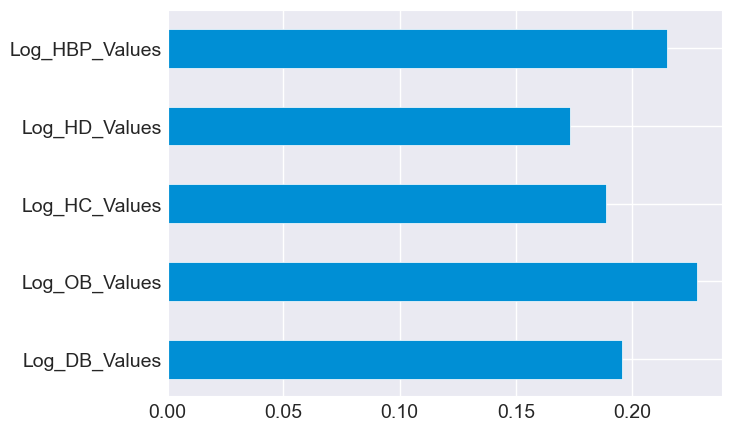

In [585]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

#### ML Analyzing using - RandomForestRegressor Model.

In [586]:

modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


modelRF.fit(X_train,y_train)
y_pred = modelRF.predict(X_test)
modelRF.score(X_test,y_test)

-0.012586657545065272

In [587]:
pred_y_RF_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_RF_df[0:5]

,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
12378,3.049273,3.143288,0.094015,0.008839,3.083195
19799,3.206803,3.104795,0.102008,0.010406,3.180990
25195,3.072693,3.125528,0.052834,0.002791,1.719480
18481,3.161247,3.158427,0.002820,0.000008,0.089207
26891,3.144152,3.128555,0.015597,0.000243,0.496063


In [588]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))

#==============================================================
Tot_Err = pred_y_RF_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_RF_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_RF_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_RF_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score -0.012586657545065272
r2:-4.244025645504999  
mae:0.04134174799160174  
mean_absolute_error =  0.04134174799160174
mean_absolute_percentage_error =  0.013157163691999239
MSE 0.0032471325605463383
MAD =  0.04134174799160174
MSE =  0.0032471325605463383
MAPE =  1.3082111741614941


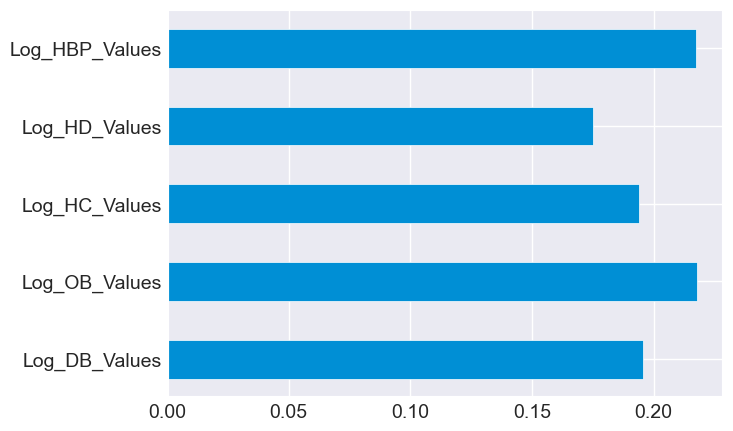

In [589]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

Grid Search parameters
